# CFM MARTA

Importing neccessary libraries

In [228]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import numpy as np
import json
import csv

This csv contains all the MARTA bus stops along with their respective latitude and longitude

In [185]:
df = pd.read_csv('/Users/ved/Documents/GitHub/CFM/GTFS-10222020/routes.txt', sep='\t')

In [203]:
df.head(10)

,stop_id,stop_code,stop_name,stop_lat,stop_lon
5213,211736,99972198,S STONE MOUNTAIN LITHONIA RD @ SOUTHLAND DR,33.775367,-84.162316
5214,211929,99972273,MARKET WAY @ HOLCOMB BRIDGE RD,34.020433,-84.321221
5215,212522,99972863,JONESBORO RD @ W MIMOSA DR,33.531735,-84.353809
5216,212535,99972876,MAIN ST @ WEST ST,33.572756,-84.414563
5217,213526,99973846,BOAT ROCK BLVD @ FULTON IND BLVD,33.726029,-84.585031


Creating a new df for the sole purpose creating a busstop ATL overlay

In [187]:
df_latlon = df[['stop_lat', 'stop_lon']].copy()

In [188]:
a = df_latlon.head()
a

,stop_lat,stop_lon
0,33.727827,-84.443085
1,33.734879,-84.436554
2,33.738094,-84.435317
3,33.737154,-84.435783
4,33.735372,-84.436595


Dimension box to calibrate the map image

In [189]:
BBox = ((df_latlon.stop_lon.min(),   df_latlon.stop_lon.max(),      
         df_latlon.stop_lat.min(), df_latlon.stop_lat.max()))
BBox

(-84.60195, -84.083398, 33.504775, 34.071208)

In [190]:
ruh_m= plt.imread('/Users/ved/Documents/GitHub/CFM/map-2.png')

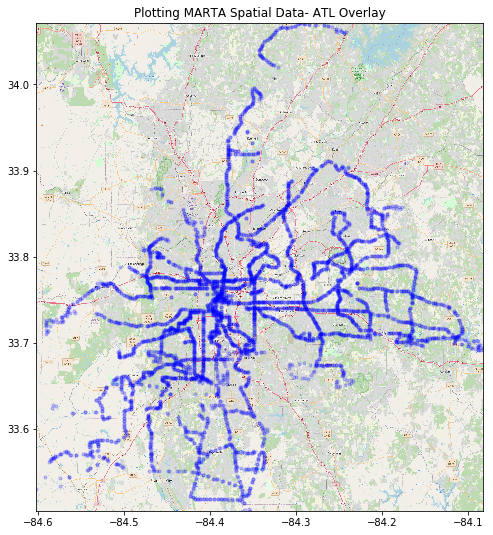

In [191]:
fig, ax = plt.subplots(figsize = (8,10))
ax.scatter(df_latlon.stop_lon, df_latlon.stop_lat, zorder=1, alpha= 0.2, c='b', s=10)
ax.set_title('Plotting MARTA Spatial Data- ATL Overlay')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')

Using FCC.gov api to return Census tracts for a given latitude/longitude input.
Example of json response below

In [259]:
json_output = requests.get('https://geo.fcc.gov/api/census/area?lat=33.727827%09&lon=-84.443085&format=json')

In [260]:
json_output.content

b'{"input":{"lat":33.727827,"lon":-84.443085},"results":[{"block_fips":"131210061003005","bbox":[-84.443906,33.722488,-84.437617,33.728036],"county_fips":"13121","county_name":"Fulton","state_fips":"13","state_code":"GA","state_name":"Georgia","block_pop_2015":156,"amt":"AMT003","bea":"BEA040","bta":"BTA024","cma":"CMA017","eag":"EAG003","ivm":"IVM017","mea":"MEA008","mta":"MTA011","pea":"PEA011","rea":"REA002","rpc":"RPC002","vpc":"VPC003"}]}'

,CensusTract,State,County,Urban,POP2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,LILATracts_1And10,...,lapop20share,lalowi20,lalowi20share,lahunv20,lahunv20share,lasnap20,lasnap20share,TractLOWI,TractHUNV,TractSNAP
0,13001950100,Georgia,Appling,0,3190,1270,0,34,0.010658,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1292,35,245
1,13001950200,Georgia,Appling,1,4530,1631,0,269,0.059382,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2518,136,445
2,13001950300,Georgia,Appling,1,5176,1969,0,123,0.023763,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1839,293,472
3,13001950400,Georgia,Appling,0,1476,606,0,0,0.000000,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,594,32,73
4,13001950500,Georgia,Appling,0,3864,1493,0,0,0.000000,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2426,59,356


In [246]:
b = [(a,b,x,y) for a,b,x,y in zip(df['stop_id'], df['stop_name'], df['stop_lat'], df['stop_lon'])]
b[:5]

[(900142, 'CASCADE AVE SW @ ORLANDO ST SW', 33.727827000000005, -84.443085),
 (900147, 'CASCADE AVE SW@ALLEGHENY ST SW', 33.734879, -84.436554),
 (900149, 'CASCADE AVE SW@WESTWOOD AVE SW', 33.738094, -84.435317),
 (900150, 'CASCADE AVE@ROGERS AVE', 33.737154, -84.435783),
 (900151, 'CASCADE AVE SW@OLYMPIAN WAY SW', 33.735372, -84.436595)]

In [198]:
results = []

for a,b,x,y in b:
    print(x,y)
#     res = requests.get(f'https://geo.fcc.gov/api/census/area?lat={x}%09&lon={y}&format=json')

    if res.status_code == 200:
        lat = res.json()['input']['lat']
        lon = res.json()['input']['lon']
        county = res.json()['results'][0]['county_name']
        census_tract = res.json()['results'][0]['block_fips']
        results.append((lat, lon, county, census_tract))
    else: 
        print(f"Request to {x}, {y} failed")

33.727827000000005 -84.443085
33.734879 -84.436554
33.738094 -84.435317
33.737154 -84.435783
33.735372 -84.436595
33.729692 -84.440967
33.727756 -84.443485
33.737745000000004 -84.43539200000001
33.73874 -84.4336
33.733473 -84.437538
33.732389000000005 -84.438363
33.731556 -84.439176
33.726519 -84.44532
33.729683 -84.44066600000001
33.731194 -84.439178
33.731964000000005 -84.43845400000001
33.702395 -84.149498
33.653275 -84.389267
33.614059000000005 -84.517288
33.61269 -84.52011999999999
33.611118 -84.523328
33.691595 -84.356725
33.691437 -84.352416
33.691174 -84.360352
33.689859000000006 -84.36032900000001
33.67722 -84.41872
33.67918 -84.418526
33.680786 -84.418488
33.654934000000004 -84.389046
33.656818 -84.385529
33.658184000000006 -84.383408
33.660477 -84.384552
33.663052 -84.385826
33.613820000000004 -84.51723199999999
33.612418 -84.520195
33.624981 -84.492186
33.623397 -84.492189
33.62267 -84.494208
33.622361 -84.49749200000001
33.688134000000005 -84.360042
33.688801 -84.35982
33.

33.689296 -84.41845500000001
33.684 -84.41830999999999
33.684006 -84.41857900000001
33.688026 -84.418327
33.689422 -84.418314
33.69688 -84.41823000000001
33.713926 -84.424417
33.695747 -84.389298
33.688788 -84.36978
33.691608 -84.365311
33.692951 -84.36640899999999
33.696166999999996 -84.369141
33.681931 -84.458023
33.680603000000005 -84.45794699999999
33.68996 -84.457596
33.690977000000004 -84.469095
33.688435 -84.457672
33.690155 -84.45721
33.6941 -84.41865
33.69567 -84.418397
33.677782 -84.45767
33.678665 -84.462051
33.674262 -84.442145
33.678774 -84.46590400000001
33.671943 -84.443075
33.681845 -84.441526
33.670055 -84.44252900000001
33.679281 -84.436222
33.683074 -84.44178000000001
33.669965000000005 -84.442421
33.668555 -84.438064
33.669495 -84.440483
33.675939 -84.439313
33.675473 -84.440224
33.685112 -84.40799
33.655462 -84.399526
33.657346000000004 -84.403631
33.656673 -84.402475
33.68772 -84.377709
33.688787 -84.373875
33.684074 -84.392715
33.691208 -84.391047
33.68122 -84.39

33.791848 -84.35374200000001
33.793048 -84.351589
33.794399 -84.351021
33.799291 -84.32448199999999
33.800596999999996 -84.326725
33.800758 -84.328737
33.822559999999996 -84.187826
33.823953 -84.190443
33.825404999999996 -84.19336700000001
33.825720000000004 -84.19497700000001
33.788914 -84.470268
33.787475 -84.328802
33.820842999999996 -84.186472
33.820713 -84.186221
33.830642 -84.309216
33.80106 -84.342659
33.802618 -84.340997
33.803514 -84.339876
33.815979 -84.235619
33.814677 -84.236401
33.813309000000004 -84.23724
33.788326 -84.325376
33.817865999999995 -84.193793
33.815219 -84.193763
33.828638 -84.195988
33.833115 -84.199043
33.788647999999995 -84.331738
33.78915 -84.33258000000001
33.793403000000005 -84.32109
33.790490999999996 -84.320993
33.802752000000005 -84.458213
33.803714 -84.459298
33.804814 -84.460453
33.805974 -84.463305
33.815757 -84.343175
33.842054 -84.32974
33.814756 -84.336517
33.673224 -84.38314
33.833822 -84.310203
33.826245 -84.25518000000001
33.828086 -84.25048

33.783269 -84.247149
33.781775 -84.247683
33.760582 -84.260452
33.759138 -84.262079
33.765309 -84.391818
33.767693 -84.39174100000001
33.758713 -84.351392
33.814745 -84.34970799999999
33.814403000000006 -84.347924
33.814384000000004 -84.347782
33.751207 -84.488603
33.754318 -84.478042
33.754249 -84.476466
33.753734 -84.473551
33.581984000000006 -84.46944
33.752098 -84.27245500000001
33.804651 -84.33798399999999
33.707184000000005 -84.224094
33.6572 -84.49467
33.674396 -84.249853
33.700842 -84.457448
33.785678000000004 -84.236717
33.785902 -84.225504
33.754334 -84.470229
33.752718 -84.469668
33.753583 -84.47235500000001
33.755727 -84.46851099999999
33.768128000000004 -84.358681
33.769176 -84.472037
33.768407 -84.471285
33.767579 -84.470259
33.766739 -84.470451
33.763412 -84.40751800000001
33.763373 -84.405373
33.768239 -84.405001
33.761528999999996 -84.19530999999999
33.759858 -84.178026
33.758207 -84.167532
33.758049 -84.167862
33.771277000000005 -84.372648
33.763933 -84.373661
33.7638

33.73999 -84.33256
33.739906 -84.306665
33.736748999999996 -84.342005
33.737617 -84.342476
33.743214 -84.290451
33.740035 -84.334778
33.727759999999996 -84.32543199999999
33.818058 -84.22112299999999
33.817704 -84.216977
33.760923 -84.164857
33.744046000000004 -84.402911
33.735025 -84.28587900000001
33.73319 -84.28447800000001
33.731891 -84.28335899999999
33.729867 -84.281719
33.734604 -84.285455
33.736988000000004 -84.286934
33.739457 -84.2883
33.738329 -84.270184
33.747294000000004 -84.31542900000001
33.787788 -84.47045899999999
33.790690999999995 -84.38522900000001
33.788435 -84.384803
33.756153000000005 -84.165498
33.791678000000005 -84.354753
33.756283 -84.16534899999999
33.7532 -84.165536
33.740746 -84.288995
33.741758000000004 -84.289473
33.751533 -84.29221899999999
33.728559999999995 -84.280709
33.727925 -84.28015500000001
33.753183 -84.39135300000001
33.739874 -84.330647
33.739754 -84.329835
33.73968 -84.3264
33.740062 -84.336017
33.790215 -84.384773
33.792347 -84.386177
33.79

33.726471000000004 -84.378507
33.728539000000005 -84.378465
33.722042 -84.373665
33.711317 -84.182176
33.772942 -84.44228199999999
33.77198 -84.440559
33.77142 -84.43890400000001
33.77142 -84.437791
33.723975 -84.17317
33.723603999999995 -84.169953
33.727522 -84.23565
33.725761999999996 -84.234844
33.715376 -84.22582299999999
33.722388 -84.214499
33.725082 -84.213995
33.709295000000004 -84.24411500000001
33.70945 -84.24538000000001
33.710004 -84.247613
33.710533 -84.249003
33.709747 -84.266975
33.698471999999995 -84.108563
33.698657 -84.107984
33.713719 -84.108338
33.69814 -84.349514
33.721852 -84.161843
33.722134000000004 -84.16232
33.70778 -84.396225
33.707018 -84.397561
33.706039000000004 -84.29528
33.710219 -84.20295
33.710108 -84.203869
33.726646 -84.235196
33.71131 -84.184263
33.711342 -84.19010300000001
33.71131 -84.192715
33.701502000000005 -84.423901
33.70145 -84.42165200000001
33.701091999999996 -84.418526
33.71363 -84.36806700000001
33.713201 -84.366698
33.686631 -84.506303


33.740159000000006 -84.343114
33.756087 -84.384289
33.600157 -84.47112299999999
33.603462 -84.472036
33.608928999999996 -84.471069
33.74736 -84.2995
33.746845 -84.38672700000001
33.753105 -84.38757
33.7523 -84.386449
33.75143 -84.384945
33.747414 -84.39233399999999
33.748851 -84.39119699999999
33.749512 -84.390693
33.75141 -84.39075
33.571894 -84.564636
33.56817 -84.53743
33.569978000000006 -84.543278
33.753505 -84.391973
33.919048 -84.356509
33.948387 -84.37105600000001
33.920862 -84.344213
33.823384999999995 -84.369357
33.823492 -84.369324
33.786811 -84.23217
34.035876 -84.342867
34.034755 -84.34199
34.032834 -84.341197
34.030606 -84.338436
34.028137 -84.335359
34.028164000000004 -84.33501
33.7173 -84.42503
33.716978000000005 -84.425138
34.041012 -84.341972
33.769856 -84.22890600000001
33.769892999999996 -84.229874
34.066705 -84.258072
34.042066 -84.341461
34.046246999999994 -84.339955
34.043225 -84.341303
34.022482000000004 -84.326959
34.041281 -84.342017
34.033916999999995 -84.3420

33.758078000000005 -84.503055
33.78882 -84.249971
33.787234999999995 -84.247505
33.790421 -84.17186
33.786424 -84.20088
33.78637 -84.20340999999999
33.7864 -84.20621
33.762077000000005 -84.535779
33.76425 -84.532067
33.796184999999994 -84.261635
33.78654 -84.23611899999999
33.785697 -84.237946
33.793671 -84.263922
33.786229999999996 -84.20303
33.78696 -84.16603
33.782803 -84.161224
33.781094 -84.161477
33.791806 -84.305939
33.731819 -84.387846
33.785858000000005 -84.241158
33.800919 -84.213448
33.799865999999994 -84.217262
33.796215000000004 -84.261993
33.795365999999994 -84.26288199999999
33.793757 -84.275451
33.793689 -84.26477
33.793751 -84.267647
33.757715000000005 -84.542486
33.759833 -84.539448
33.76135 -84.536973
33.777265 -84.474085
33.775609 -84.47376700000001
33.785742 -84.265918
33.790941 -84.264772
33.685435999999996 -84.449015
33.620398 -84.525501
33.692972999999995 -84.35777900000001
33.799478 -84.217729
33.759262 -84.46916999999999
33.797855 -84.25946
33.801409 -84.30946

33.777671999999995 -84.477124
33.776408 -84.474529
33.897528 -84.38155400000001
33.900208 -84.380478
33.883138 -84.380128
33.874538 -84.294174
33.876497 -84.293397
33.872205 -84.30936
33.885218 -84.310055
33.883061 -84.309511
33.882058 -84.30953199999999
33.880196999999995 -84.309511
33.900683 -84.278716
33.857521000000006 -84.381584
33.857882000000004 -84.38148100000001
33.845641 -84.368791
33.786535 -84.279414
33.788790999999996 -84.279446
33.788934000000005 -84.27937
33.7873 -84.212456
33.786915 -84.217674
33.786204999999995 -84.222298
33.872971 -84.38096999999999
33.875271000000005 -84.380612
33.877285 -84.379764
33.873007 -84.381089
33.790316 -84.411986
33.773975 -84.35850500000001
33.773740000000004 -84.359401
33.885844 -84.308094
33.906925 -84.26900699999999
33.877098 -84.29287
33.879169 -84.291641
33.88166 -84.290329
33.848801 -84.366417
33.848236 -84.36631
33.853944 -84.35770500000001
33.854168 -84.355561
33.854786 -84.353721
33.895237 -84.239599
33.894887 -84.23750799999999
3

33.773634 -84.29789699999999
33.773109000000005 -84.37106800000001
33.782658000000005 -84.429801
33.707018 -84.397637
33.784933 -84.27930699999999
33.760701 -84.292503
33.766276 -84.254005
33.783735 -84.30199
33.784836 -84.303697
33.766884000000005 -84.292713
33.766812 -84.292615
33.764548 -84.292714
33.764171999999995 -84.292465
33.760469 -84.243573
33.7608 -84.24425
33.769290000000005 -84.251056
33.765997 -84.251537
33.760281 -84.251549
33.759531 -84.251652
33.758449 -84.25166800000001
33.758122 -84.251589
33.812418 -84.242572
33.789864 -84.25241899999999
33.791259000000004 -84.256288
33.792119 -84.25831099999999
33.766148 -84.51125
33.763184 -84.469719
33.771223 -84.413398
33.763754999999996 -84.447159
33.771553999999995 -84.384888
33.759015999999995 -84.291335
33.759122999999995 -84.291488
33.776657 -84.280273
33.77669 -84.279725
33.766932000000004 -84.30696800000001
33.780311 -84.353553
33.770857 -84.352298
33.772171 -84.352325
33.761741 -84.46952399999999
33.78277 -84.486809
33.7

33.690843 -84.35578000000001
33.691631 -84.35342299999999
33.689403999999996 -84.360039
33.690899 -84.35996999999999
33.692863 -84.359932
33.668171 -84.408508
33.681459999999994 -84.41009
33.681346000000005 -84.42002
33.653989 -84.400253
33.665921999999995 -84.41864
33.662861 -84.39172099999999
33.665096999999996 -84.380289
33.66075 -84.49645
33.670402 -84.408801
33.668602 -84.408913
33.666759000000006 -84.409042
33.665413 -84.42846
33.631785 -84.457961
33.624805 -84.465591
33.673488 -84.276624
33.673332 -84.268631
33.681477 -84.42343100000001
33.673525 -84.371444
33.697262 -84.271384
33.658297999999995 -84.415899
33.68079 -84.38217900000001
33.650979 -84.449623
33.5997 -84.47097
33.597406 -84.469785
33.588118 -84.469115
33.664115 -84.41819699999999
33.668479999999995 -84.41874
33.670111999999996 -84.41885500000001
33.67358 -84.41871
33.681269 -84.415534
33.683386999999996 -84.407912
33.623453999999995 -84.474422
33.681074 -84.384732
33.654551 -84.449444
33.654567 -84.451735
33.65509 -

33.729510999999995 -84.42327900000001
33.730488 -84.423294
33.735841 -84.422032
33.738073 -84.418446
33.723175 -84.45026999999999
33.73811 -84.42023499999999
33.7384 -84.423296
33.731809000000005 -84.389379
33.735640000000004 -84.39066700000001
33.732963 -84.390825
33.726645 -84.388059
33.726421 -84.387961
33.720368 -84.43765
33.717079 -84.44386300000001
33.715782 -84.441994
33.715346999999994 -84.441399
33.732079999999996 -84.424516
33.737678 -84.241923
33.740126000000004 -84.402309
33.738147999999995 -84.401677
33.738157 -84.40159
33.740337 -84.349386
33.740123 -84.348179
33.726488 -84.34948299999999
33.727819000000004 -84.34944899999999
33.734177 -84.349401
33.720827 -84.468055
33.720106 -84.471542
33.71971 -84.473628
33.737149 -84.229359
33.737069 -84.229272
33.737041 -84.22779399999999
33.714463 -84.434262
33.747195 -84.22229200000001
33.754236 -84.268627
33.73735 -84.238861
33.73737 -84.236163
33.737288 -84.234413
33.738332 -84.411805
33.7313 -84.40816600000001
33.739857 -84.3550

33.523927 -84.356961
33.522628000000005 -84.358662
33.522503 -84.358163
33.522537 -84.361892
33.522394 -84.36154499999999
33.579569 -84.530586
33.574847 -84.530361
33.753479 -84.391745
33.570761 -84.539411
33.754407 -84.37984499999999
33.854138 -84.217676
33.541856 -84.41680500000001
33.536679 -84.418371
33.533419 -84.419342
33.530553000000005 -84.42021700000001
33.52689 -84.42186
33.521767 -84.423317
33.520489000000005 -84.42027
33.518691 -84.417731
33.517959999999995 -84.414262
33.518356 -84.411976
33.518269000000004 -84.40787900000001
33.518298 -84.404443
33.518221000000004 -84.39970600000001
33.518143 -84.39532700000001
33.518146 -84.39123000000001
33.518023 -84.38714399999999
33.518105 -84.383481
33.517891999999996 -84.379698
33.517789 -84.368989
33.517585 -84.365131
33.517897999999995 -84.366139
33.517995 -84.36934699999999
33.544002 -84.563468
33.543838 -84.563521
33.54373 -84.591719
33.570525 -84.372077
33.567758000000005 -84.37177199999999
33.564240000000005 -84.371379
33.5619

33.555483 -84.501478
33.974358 -84.355637
33.923721 -84.379011
33.769042999999996 -84.349058
33.767871 -84.349068
33.765158 -84.349242
33.762357 -84.349263
33.762357 -84.349154
33.764899 -84.349122
33.768936 -84.348927
33.770994 -84.348895
33.923119 -84.370666
33.920108 -84.379042
33.905167 -84.378537
34.057182 -84.327896
34.055408 -84.329323
34.053847999999995 -84.331345
33.705787 -84.12679200000001
33.705706 -84.126019
33.705663 -84.122175
33.705855 -84.121893
33.704984 -84.144601
33.704788 -84.14479200000001
33.559442 -84.50755699999999
33.56295 -84.518218
33.559206 -84.508329
33.55113 -84.47069499999999
33.552167 -84.465564
33.55673 -84.467073
33.563479 -84.468539
33.691381 -84.35314
33.69696 -84.373728
33.69688 -84.371208
33.688817 -84.364023
33.688665 -84.363947
33.771138 -84.349026
33.657945 -84.50873399999999
33.659197999999996 -84.508976
33.657379 -84.510242
33.656417 -84.512585
33.656535 -84.511999
33.750593 -84.396743
33.701143 -84.176201
33.701181 -84.18432800000001
33.7022

33.563039 -84.584636
33.640531 -84.417144
33.653694 -84.513784
33.756994 -84.387998
33.658464 -84.503924
33.621285 -84.352648
33.623791 -84.354049
33.625698 -84.354973
33.628643 -84.355886
33.632215 -84.357276
33.635249 -84.358884
33.639295000000004 -84.36105699999999
33.643413 -84.363252
33.646671000000005 -84.364773
33.619465000000005 -84.362459
33.843702 -84.42845
33.843734999999995 -84.428304
33.754052 -84.391452
33.753899 -84.39156
33.750161 -84.385915
33.749951 -84.375675
33.772764 -84.252151
33.692593 -84.092323
33.918973 -84.348156
33.733771999999995 -84.211158
33.570364 -84.539278
34.068665 -84.267777
34.068951 -84.267548
33.672799 -84.277819
33.565841 -84.344061
33.559171 -84.345784
33.554425 -84.34703
33.549527000000005 -84.34830799999999
33.537842 -84.351286
33.553206 -84.351182
33.55353 -84.355829
33.553536 -84.358621
33.555681 -84.368392
33.5542 -84.370653
33.550497 -84.37015699999999
33.543684000000006 -84.368256
33.539244000000004 -84.365966
33.533299 -84.364239
33.5382

33.531377 -84.354091
33.570112 -84.342902
33.553917999999996 -84.414249
33.554348 -84.414488
33.570524 -84.404821
33.572321 -84.408467
33.57225 -84.40812
33.572471 -84.412036
33.572712 -84.413012
33.575307 -84.41449
33.575415 -84.41456600000001
33.664753000000005 -84.467253
33.679590999999995 -84.440122
33.690968 -84.471846
33.654937 -84.484187
33.654971999999994 -84.484275
33.582021999999995 -84.530392
33.599497 -84.33764599999999
33.596515999999994 -84.333892
33.858281 -84.18893299999999
33.848244 -84.200967
33.856895 -84.197807
33.845326 -84.201004
33.840475 -84.201012
33.84878 -84.200846
33.857221 -84.193278
33.804915 -84.239328
33.77117 -84.39898000000001
33.598114 -84.498517
33.646133 -84.503322
33.648438 -84.503072
33.578807 -84.415525
33.621131 -84.383258
33.62728 -84.385809
33.627217 -84.38566800000001
33.734733 -84.562595
33.734941 -84.55743299999999
33.772213 -84.417281
33.772231 -84.41403299999999
33.772842 -84.40895
33.703662 -84.355448
33.846249 -84.25563000000001
33.7578

In [262]:
results[:10]

[(33.727827000000005, -84.443085, 'Fulton', '131210061003005'),
 (33.734879, -84.436554, 'Fulton', '131210060004008'),
 (33.738094, -84.435317, 'Fulton', '131210060002004'),
 (33.737154, -84.435783, 'Fulton', '131210060003000'),
 (33.735372, -84.436595, 'Fulton', '131210060003000'),
 (33.729692, -84.440967, 'Fulton', '131210061004004'),
 (33.727756, -84.443485, 'Fulton', '131210061004014'),
 (33.737745000000004, -84.43539200000001, 'Fulton', '131210060004005'),
 (33.73874, -84.4336, 'Fulton', '131210060004000'),
 (33.733473, -84.437538, 'Fulton', '131210060003007')]

In [219]:
from collections import Counter
Counter(county)

Counter({'Fulton': 2822,
         'DeKalb': 1966,
         'Clayton': 420,
         'Fayette': 1,
         'Cobb': 9})

In [243]:
with open('stops_censustracts.csv', 'w') as test_file:
    file_writer = csv.writer(test_file, delimiter=',', lineterminator='\n')
    for row in results:
        file_writer.writerow(row)

In [258]:
with open('stops_new.csv', 'w') as test_file:
    file_writer = csv.writer(test_file, delimiter=',', lineterminator='\n')
    for row in b:
        file_writer.writerow(row)

df2 is data from the FDA on SNAP EBT usage measured within census tracts

In [263]:
df2 = pd.read_excel('/Users/ved/Desktop/MARTA/Georgia2015Census.xlsx')  
df2.head()

,CensusTract,State,County,Urban,POP2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,LILATracts_1And10,...,lapop20share,lalowi20,lalowi20share,lahunv20,lahunv20share,lasnap20,lasnap20share,TractLOWI,TractHUNV,TractSNAP
0,13001950100,Georgia,Appling,0,3190,1270,0,34,0.010658,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1292,35,245
1,13001950200,Georgia,Appling,1,4530,1631,0,269,0.059382,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2518,136,445
2,13001950300,Georgia,Appling,1,5176,1969,0,123,0.023763,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1839,293,472
3,13001950400,Georgia,Appling,0,1476,606,0,0,0.000000,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,594,32,73
4,13001950500,Georgia,Appling,0,3864,1493,0,0,0.000000,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2426,59,356


df3 is the product of the original data cleaning, with census tracts now attached to bus stop ids

In [276]:
df3 = pd.read_csv('/Users/ved/Desktop/MARTA/stops_censustracts.csv')
df3

,stop_id,stop_name,stop_lat,stop_lon,count_name,census_tract_detail,census_tract
0,900142,CASCADE AVE SW @ ORLANDO ST SW,33.727827,-84.443085,Fulton,1.312100e+14,13121006100
1,900147,CASCADE AVE SW@ALLEGHENY ST SW,33.734879,-84.436554,Fulton,1.312100e+14,13121006000
2,900149,CASCADE AVE SW@WESTWOOD AVE SW,33.738094,-84.435317,Fulton,1.312100e+14,13121006000
3,900150,CASCADE AVE@ROGERS AVE,33.737154,-84.435783,Fulton,1.312100e+14,13121006000
4,900151,CASCADE AVE SW@OLYMPIAN WAY SW,33.735372,-84.436595,Fulton,1.312100e+14,13121006000
5,900153,CASCADE AVE SW@ALTADENA PL SW,33.729692,-84.440967,Fulton,1.312100e+14,13121006100
6,900155,CASCADE AVE@CASCADE TER,33.727756,-84.443485,Fulton,1.312100e+14,13121006100
7,900174,CASCADE AVE SW @ DONNELLY AVE SW,33.737745,-84.435392,Fulton,1.312100e+14,13121006000
8,900175,CASCADE AVE @ RALPH D ABERNATHY BLVD,33.738740,-84.433600,Fulton,1.312100e+14,13121006000
9,900177,CASCADE AVE SW@BEECHER ST SW,33.733473,-84.437538,Fulton,1.312100e+14,13121006000


In [278]:
merged_inner = pd.merge(left=df3, right=df2, left_on='census_tract', right_on='CensusTract')
merged_inner

,stop_id,stop_name,stop_lat,stop_lon,count_name,census_tract_detail,census_tract,CensusTract,State,County,...,lapop20share,lalowi20,lalowi20share,lahunv20,lahunv20share,lasnap20,lasnap20share,TractLOWI,TractHUNV,TractSNAP
0,900142,CASCADE AVE SW @ ORLANDO ST SW,33.727827,-84.443085,Fulton,1.312100e+14,13121006100,13121006100,Georgia,Fulton,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2166,293,488
1,900153,CASCADE AVE SW@ALTADENA PL SW,33.729692,-84.440967,Fulton,1.312100e+14,13121006100,13121006100,Georgia,Fulton,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2166,293,488
2,900155,CASCADE AVE@CASCADE TER,33.727756,-84.443485,Fulton,1.312100e+14,13121006100,13121006100,Georgia,Fulton,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2166,293,488
3,900178,CASCADE AVE SW @ WESTHAVEN DR SW,33.732389,-84.438363,Fulton,1.312100e+14,13121006100,13121006100,Georgia,Fulton,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2166,293,488
4,900179,CASCADE AVE SW@RICHLAND RD,33.731556,-84.439176,Fulton,1.312100e+14,13121006100,13121006100,Georgia,Fulton,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2166,293,488
5,900181,CASCADE AVE SW@ CASCADE CIR,33.726519,-84.445320,Fulton,1.312100e+14,13121006100,13121006100,Georgia,Fulton,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2166,293,488
6,900209,CASCADE AVE SW@PINEVIEW TER SW,33.729683,-84.440666,Fulton,1.312100e+14,13121006100,13121006100,Georgia,Fulton,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2166,293,488
7,900211,CASCADE AVE SW@RICHLAND RD SW,33.731194,-84.439178,Fulton,1.312100e+14,13121006100,13121006100,Georgia,Fulton,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2166,293,488
8,900212,CASCADE AVE SW@WESTHAVEN DR SW,33.731964,-84.438454,Fulton,1.312100e+14,13121006100,13121006100,Georgia,Fulton,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2166,293,488
9,122232,CASCADE AVE SW@1120,33.725174,-84.447176,Fulton,1.312100e+14,13121006100,13121006100,Georgia,Fulton,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2166,293,488


In [283]:
merged_inner.to_csv('/Users/ved/Desktop/MARTA/compiled.csv')

In [292]:
df4 = pd.read_csv('/Users/ved/Documents/GitHub/CFM/GTFS-10222020/trips.txt', delimiter = ',', sep='\t')
df4

,route_id,service_id,trip_id,trip_headsign,direction_id,block_id,shape_id
0,14829,3,6073870,AUBURN AVE-PEACHTREE CTR-OLYMPIC PARK,0,1024118,87086
1,14829,3,6073869,AUBURN AVE-PEACHTREE CTR-OLYMPIC PARK,0,1024119,87086
2,14829,3,6073868,AUBURN AVE-PEACHTREE CTR-OLYMPIC PARK,0,1024118,87086
3,14829,3,6073867,AUBURN AVE-PEACHTREE CTR-OLYMPIC PARK,0,1024119,87086
4,14829,3,6073866,AUBURN AVE-PEACHTREE CTR-OLYMPIC PARK,0,1024118,87086
5,14829,3,6073865,AUBURN AVE-PEACHTREE CTR-OLYMPIC PARK,0,1024119,87086
6,14829,3,6073864,AUBURN AVE-PEACHTREE CTR-OLYMPIC PARK,0,1024118,87086
7,14829,3,6073863,AUBURN AVE-PEACHTREE CTR-OLYMPIC PARK,0,1024119,87086
8,14829,3,6073862,AUBURN AVE-PEACHTREE CTR-OLYMPIC PARK,0,1024118,87086
9,14829,3,6073861,AUBURN AVE-PEACHTREE CTR-OLYMPIC PARK,0,1024119,87086


In [289]:
df

,stop_id,stop_code,stop_name,stop_lat,stop_lon
0,900142,99330,CASCADE AVE SW @ ORLANDO ST SW,33.727827,-84.443085
1,900147,99358,CASCADE AVE SW@ALLEGHENY ST SW,33.734879,-84.436554
2,900149,99370,CASCADE AVE SW@WESTWOOD AVE SW,33.738094,-84.435317
3,900150,99372,CASCADE AVE@ROGERS AVE,33.737154,-84.435783
4,900151,99374,CASCADE AVE SW@OLYMPIAN WAY SW,33.735372,-84.436595
5,900153,99386,CASCADE AVE SW@ALTADENA PL SW,33.729692,-84.440967
6,900155,99389,CASCADE AVE@CASCADE TER,33.727756,-84.443485
7,900174,99364,CASCADE AVE SW @ DONNELLY AVE SW,33.737745,-84.435392
8,900175,99366,CASCADE AVE @ RALPH D ABERNATHY BLVD,33.738740,-84.433600
9,900177,99378,CASCADE AVE SW@BEECHER ST SW,33.733473,-84.437538


https://www.itsmarta.com/uploadedFiles/More/Transit_Oriented_Development/Station%20Profile%20Rev%202017-11-03%20Inman%20Park.pdf

In [293]:
block_id = [410816,410815,410816,411257,410815,412337,411678,411679,411257,410815,412338,412337,412338,411679,412337,411678,410816,410816,410815,411257,411679,412338,411257,411257,410815,411679,411257,412337,411678,411678,412337,410815,412338,410816,412338]

In [294]:
set(block_id)

{410815, 410816, 411257, 411678, 411679, 412337, 412338}

In [ ]:
211927
211582
211889
211891
211894
212817